In [ ]:
# Description: This program classifies patients as having chronic kidney disease (CKD) or not using Artificial Neural Networks (ANN)

In [23]:
# Import libraries
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import keras as k

In [24]:
# Load the data 
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('kidney_disease.csv')

# Print the first 5 rows
df.head()

Saving kidney_disease.csv to kidney_disease (1).csv


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
# Data Set Column Identifiers 
# bp = blood pressure
# sg = specific gravity 
# al = albumin 
# su = sugar
# rbc = red blood cell
# bu = blood urea
# sc = serum creatinine
# sod = sodium 
# pot = pottasium 
# hemo = hemoglobin

In [25]:
# Get the shape of the data 
df.shape
# This shows there are 400 patients with 26 data points for each pt

(400, 26)

In [26]:
# Show df's statistics
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


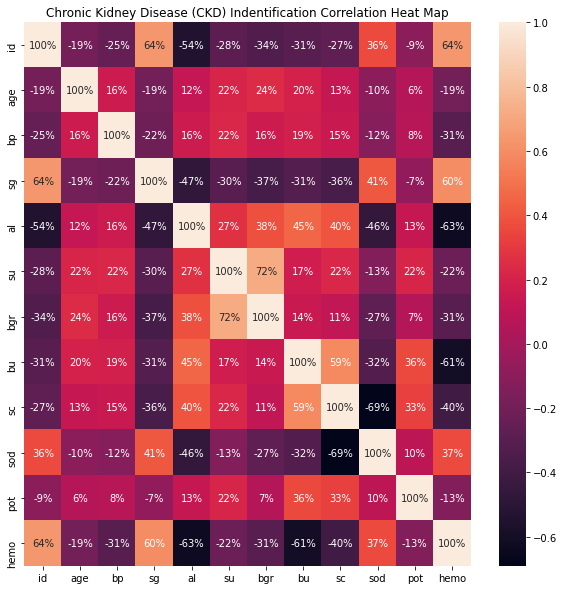

In [27]:
# Visualize the correlation 
plt.figure(figsize=(10,10))
plt.title('Chronic Kidney Disease (CKD) Indentification Correlation Heat Map',fontsize=12)
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [28]:
# Create a list of column names to keep 
columns_to_retain = ['sg', 'al', 'sc', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'classification']

# Drop the columns that are not in the above parameters
df = df.drop( [col for col in df.columns if not col in columns_to_retain] , axis = 1 )

# Drop the rows with na/missing values 
df = df.dropna(axis=0)

In [29]:
# Transform the non-numeric data in the columns
for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform( df[column] )

In [30]:
# Print the first 5 rows of the new cleaned data set
df.head()

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0


In [31]:
# Split the data into independent/feature (X) data set and dependent/target (Y) data set
X = df.drop(['classification'], axis=1)
y = df['classification']

In [32]:
# Feature Scaling 
# Min-Max Scaler Method scales the data set to that all the input features lie between 0 and 1
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [33]:
# Split the data into 80% training and 20% testing & shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

In [34]:
# Build the model
model = Sequential()
model.add( Dense(256,input_dim= len(X.columns),kernel_initializer= k.initializers.random_normal(seed=13),activation='relu') )
model.add( Dense(1, activation='hard_sigmoid') )

In [35]:
# Compile the model 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
# Train the model 
history = model.fit(X_train, y_train, epochs=2000, batch_size= X_train.shape[0])

Epoch 1/2000
229/229 [==============================] - 0s 401us/step - loss: 0.6928 - accuracy: 0.4716
Epoch 2/2000
229/229 [==============================] - 0s 12us/step - loss: 0.6878 - accuracy: 0.5066
Epoch 3/2000
229/229 [==============================] - 0s 13us/step - loss: 0.6820 - accuracy: 0.6943
Epoch 4/2000
229/229 [==============================] - 0s 14us/step - loss: 0.6754 - accuracy: 0.7860
Epoch 5/2000
229/229 [==============================] - 0s 15us/step - loss: 0.6689 - accuracy: 0.8472
Epoch 6/2000
229/229 [==============================] - 0s 14us/step - loss: 0.6625 - accuracy: 0.8690
Epoch 7/2000
229/229 [==============================] - 0s 12us/step - loss: 0.6563 - accuracy: 0.8777
Epoch 8/2000
229/229 [==============================] - 0s 13us/step - loss: 0.6501 - accuracy: 0.8865
Epoch 9/2000
229/229 [==============================] - 0s 12us/step - loss: 0.6440 - accuracy: 0.8952
Epoch 10/2000
229/229 [==============================] - 0s 13us/step - 

In [37]:
# Save the model 
model.save('ckd.model')

Text(0.5, 0, 'Epoch')

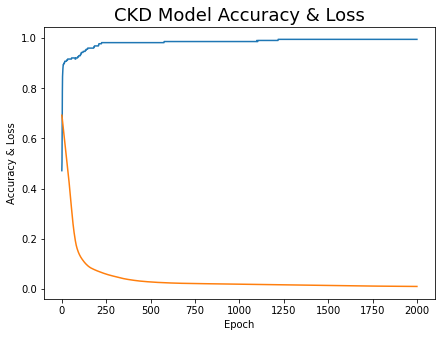

In [48]:
# Visualize the models loss and accuracy
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('CKD Model Accuracy & Loss',fontsize=18)
plt.ylabel('Accuracy & Loss')
plt.xlabel('Epoch')

In [43]:
# Get the shape of the test and training data
print('Shape of training data:',X_train.shape)
print('Shape of test data:',X_test.shape)

Shape of training data: (229, 6)
Shape of test data: (58, 6)


In [44]:
# Show the actual and predicted values
pred = model.predict(X_test)
pred = [1 if y>=0.5 else 0 for y in pred]
pred

print('Original : {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted : {0}'.format(", ".join(str(x) for x in pred)))

Original : 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1
Predicted : 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1


In [45]:
# Get the model's accuracy, precision, recall, and the f1-score
print('Chronic Kidney Disease Prediction Test Results')
print()
print(classification_report(y_test, pred))

Chronic Kidney Disease Prediction Test Results

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        30

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



In [47]:
# Conclusion
print('Using the Sequential Model gave a 100% accuracy in predciting CKD.')

Using the Sequential Model gave a 100% accuracy in predciting CKD.
